In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Laptop Regression

## Exploratory Data Analysis

In [135]:
test_data = pd.read_json('test_dataset.json').reset_index()
train_data = pd.read_json('train_dataset.json').reset_index()
val_data = pd.read_json('val_dataset.json').reset_index()
data = [test_data, train_data, val_data]
data = pd.concat(data)

In [136]:
data

,index,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
0,5124,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2369.0
1,9595,integrated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,2,4 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2299.0
2,4926,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,new,1500.0,producer warranty,"15"" - 15.9""",5999.0
3,2607,integrated graphics,"[lan 10/100/1000 mbps, nfc (near field communi...",3200 x 1800,2,8 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[camera, speakers, microphone]",ddr3l,NaN,intel core i5,new,256.0,producer warranty,"13"" - 13.9""",3399.0
4,1185,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,4 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,1.6,intel celeron dual-core,new,500.0,producer warranty,"15"" - 15.9""",1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,4433,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",3840 x 2160,4,16 gb,[no system],ssd + hdd,"[keyboard, touchpad]","[camera, speakers, microphone]",ddr4,2.8,intel core i7,new,1256.0,producer warranty,"15"" - 15.9""",7936.0
1567,9242,None,None,None,6,None,None,None,None,None,None,NaN,None,new,NaN,seller warranty,None,2890.0
1568,3982,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,4 gb,[no system],ssd,"[keyboard, touchpad]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2716.0
1569,9673,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,16 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,480.0,producer warranty,"15"" - 15.9""",4319.0


In [137]:
data.drop('state', axis=1, inplace=True)

In [138]:
data.isna().sum()

index                       0
graphic card type         496
communications            782
resolution (px)           608
CPU cores                   0
RAM size                  450
operating system          650
drive type                435
input devices             678
multimedia                708
RAM type                  864
CPU clock speed (GHz)     936
CPU model                 533
drive memory size (GB)    481
warranty                    0
screen size               346
buynow_price                0
dtype: int64

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7853 entries, 0 to 1570
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   7853 non-null   int64  
 1   graphic card type       7357 non-null   object 
 2   communications          7071 non-null   object 
 3   resolution (px)         7245 non-null   object 
 4   CPU cores               7853 non-null   object 
 5   RAM size                7403 non-null   object 
 6   operating system        7203 non-null   object 
 7   drive type              7418 non-null   object 
 8   input devices           7175 non-null   object 
 9   multimedia              7145 non-null   object 
 10  RAM type                6989 non-null   object 
 11  CPU clock speed (GHz)   6917 non-null   float64
 12  CPU model               7320 non-null   object 
 13  drive memory size (GB)  7372 non-null   float64
 14  warranty                7853 non-null   objec

We see that the proportion of null values in our features is relatively low compared to our number of observations (~<10%), so lets drop rows with null values.

In [140]:
data = data.dropna()

In [141]:
categoricals = data.select_dtypes(include=['object'])
categoricals

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU model,warranty,screen size
0,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,intel core i3,producer warranty,"15"" - 15.9"""
1,integrated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,2,4 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,intel core i3,producer warranty,"15"" - 15.9"""
2,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,intel core i7,producer warranty,"15"" - 15.9"""
4,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,4 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,intel celeron dual-core,producer warranty,"15"" - 15.9"""
5,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps, modem 4g (...",1366 x 768,2,4 gb,"[windows 7 professional 64-bit, windows 10 pro...",hdd,"[keyboard, touchpad, illuminated keyboard]","[camera, speakers, microphone]",ddr4,intel core i5,producer warranty,"12"" - 12.9"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,8 gb,[windows 8.1 home 64-bit],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3l,intel core i7,producer warranty,"15"" - 15.9"""
1566,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",3840 x 2160,4,16 gb,[no system],ssd + hdd,"[keyboard, touchpad]","[camera, speakers, microphone]",ddr4,intel core i7,producer warranty,"15"" - 15.9"""
1568,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,4 gb,[no system],ssd,"[keyboard, touchpad]","[SD card reader, camera, speakers, microphone]",ddr4,intel core i3,producer warranty,"15"" - 15.9"""
1569,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,16 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,intel core i5,producer warranty,"15"" - 15.9"""


## Preprocessing/Data Cleaning

We see that there are several features (communications, operating system, input devices, multimedia) that are in comma delimited list form. Let's examine the dimensions of each of these features before one hot encoding to ensure that we are not introducing too much sparsity.

In [142]:
list_categoricals = ['communications', 'operating system', 'input devices', 'multimedia']
list_categorical_dict = {}
for col in list_categoricals:
    unique_lists = data[col].value_counts().index
    unique_values = list(set(item for sublist in unique_lists for item in sublist))
    list_categorical_dict[col] = unique_values

for k, v in list_categorical_dict.items():
    print(k, len(v))

communications 13
operating system 11
input devices 4
multimedia 4


This seems to be okay, we have ~8000 observations so creating dummies here for each unique value should not introduce too much sparsity.

In [143]:
for col in list_categoricals:
    dummies = data[col].str.join(' | ').str.get_dummies()
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
    categoricals.drop(col, axis=1, inplace=True)

In [144]:
for col in categoricals:
    print(col, data[col].unique())
    print('\n')

graphic card type ['dedicated graphics' 'integrated graphics']


resolution (px) ['1920 x 1080' '1366 x 768' '1600 x 900' '3840 x 2160' '3200 x 1800'
 '2560 x 1440' '1920 x 1200' '2560 x 1600' '1280 x 800' '2880 x 1620'
 '1920 x 1280' '2160 x 1440']


CPU cores ['2' '4' '3' '8']


RAM size ['8 gb' '4 gb' '16 gb' '6 gb' '12 gb' '32 gb' '2 gb' '20 gb' '24 gb']


drive type ['hdd' 'ssd' 'ssd + hdd' 'emmc' 'hybrid']


RAM type ['ddr4' 'ddr3' 'ddr3l']


CPU model ['intel core i3' 'intel core i7' 'intel celeron dual-core' 'intel core i5'
 'intel pentium dual-core' 'amd a8' 'amd a12' 'other CPU' 'intel celeron '
 'amd a6' 'amd e1' 'intel celeron quad core ' 'intel pentium quad-core '
 'amd a4' 'amd a10' 'intel core m' 'intel celeron m']


warranty ['producer warranty' 'seller warranty']


screen size ['15" - 15.9"' '12" - 12.9"' '14" - 14.9"' '17" - 17.9"' '13" - 13.9"'
 '11.9" and less']




Now let's handle screen size and resolution. Let's use the first number in the string as our integer for screen size. We see that for resolution, width appears to be mapped 1:1 to height, so we can either select width or height. Let's use height as this is the standard convention (1920x1080 is referred to as 1080p).

In [145]:
data['screen size'] = data['screen size'].apply(lambda x: int(str(x)[:2]))
categoricals.drop('screen size', axis=1, inplace=True)

In [146]:
data['resolution (px)'] = data['resolution (px)'].apply(lambda x: int(x.split('x')[0]))
categoricals.drop('resolution (px)', axis=1, inplace=True)

Now let's handle RAM size and CPU cores. RAM size let's drop the ' gb' and cast to int. CPU cores we just need to cast to int.

In [147]:
data['RAM size'] = data['RAM size'].str.replace(' gb', '').astype(int)
categoricals.drop('RAM size', axis=1, inplace=True)

In [148]:
data['CPU cores'] = data['CPU cores'].astype(int)
categoricals.drop('CPU cores', axis=1, inplace=True)

For the rest of the categoricals, let's get our dummies.

In [149]:
for col in categoricals:
    dummies = pd.get_dummies(col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6109 entries, 0 to 1570
Data columns (total 84 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              6109 non-null   int64  
 1   resolution (px)                    6109 non-null   int64  
 2   CPU cores                          6109 non-null   int32  
 3   RAM size                           6109 non-null   int32  
 4   CPU clock speed (GHz)              6109 non-null   float64
 5   drive memory size (GB)             6109 non-null   float64
 6   screen size                        6109 non-null   int64  
 7   buynow_price                       6109 non-null   float64
 8    bluetooth                         6109 non-null   int64  
 9    bluetooth                         6109 non-null   int64  
 10   gps                               6109 non-null   int64  
 11   gps                               6109 non-null   int64  
 1

<Axes: >

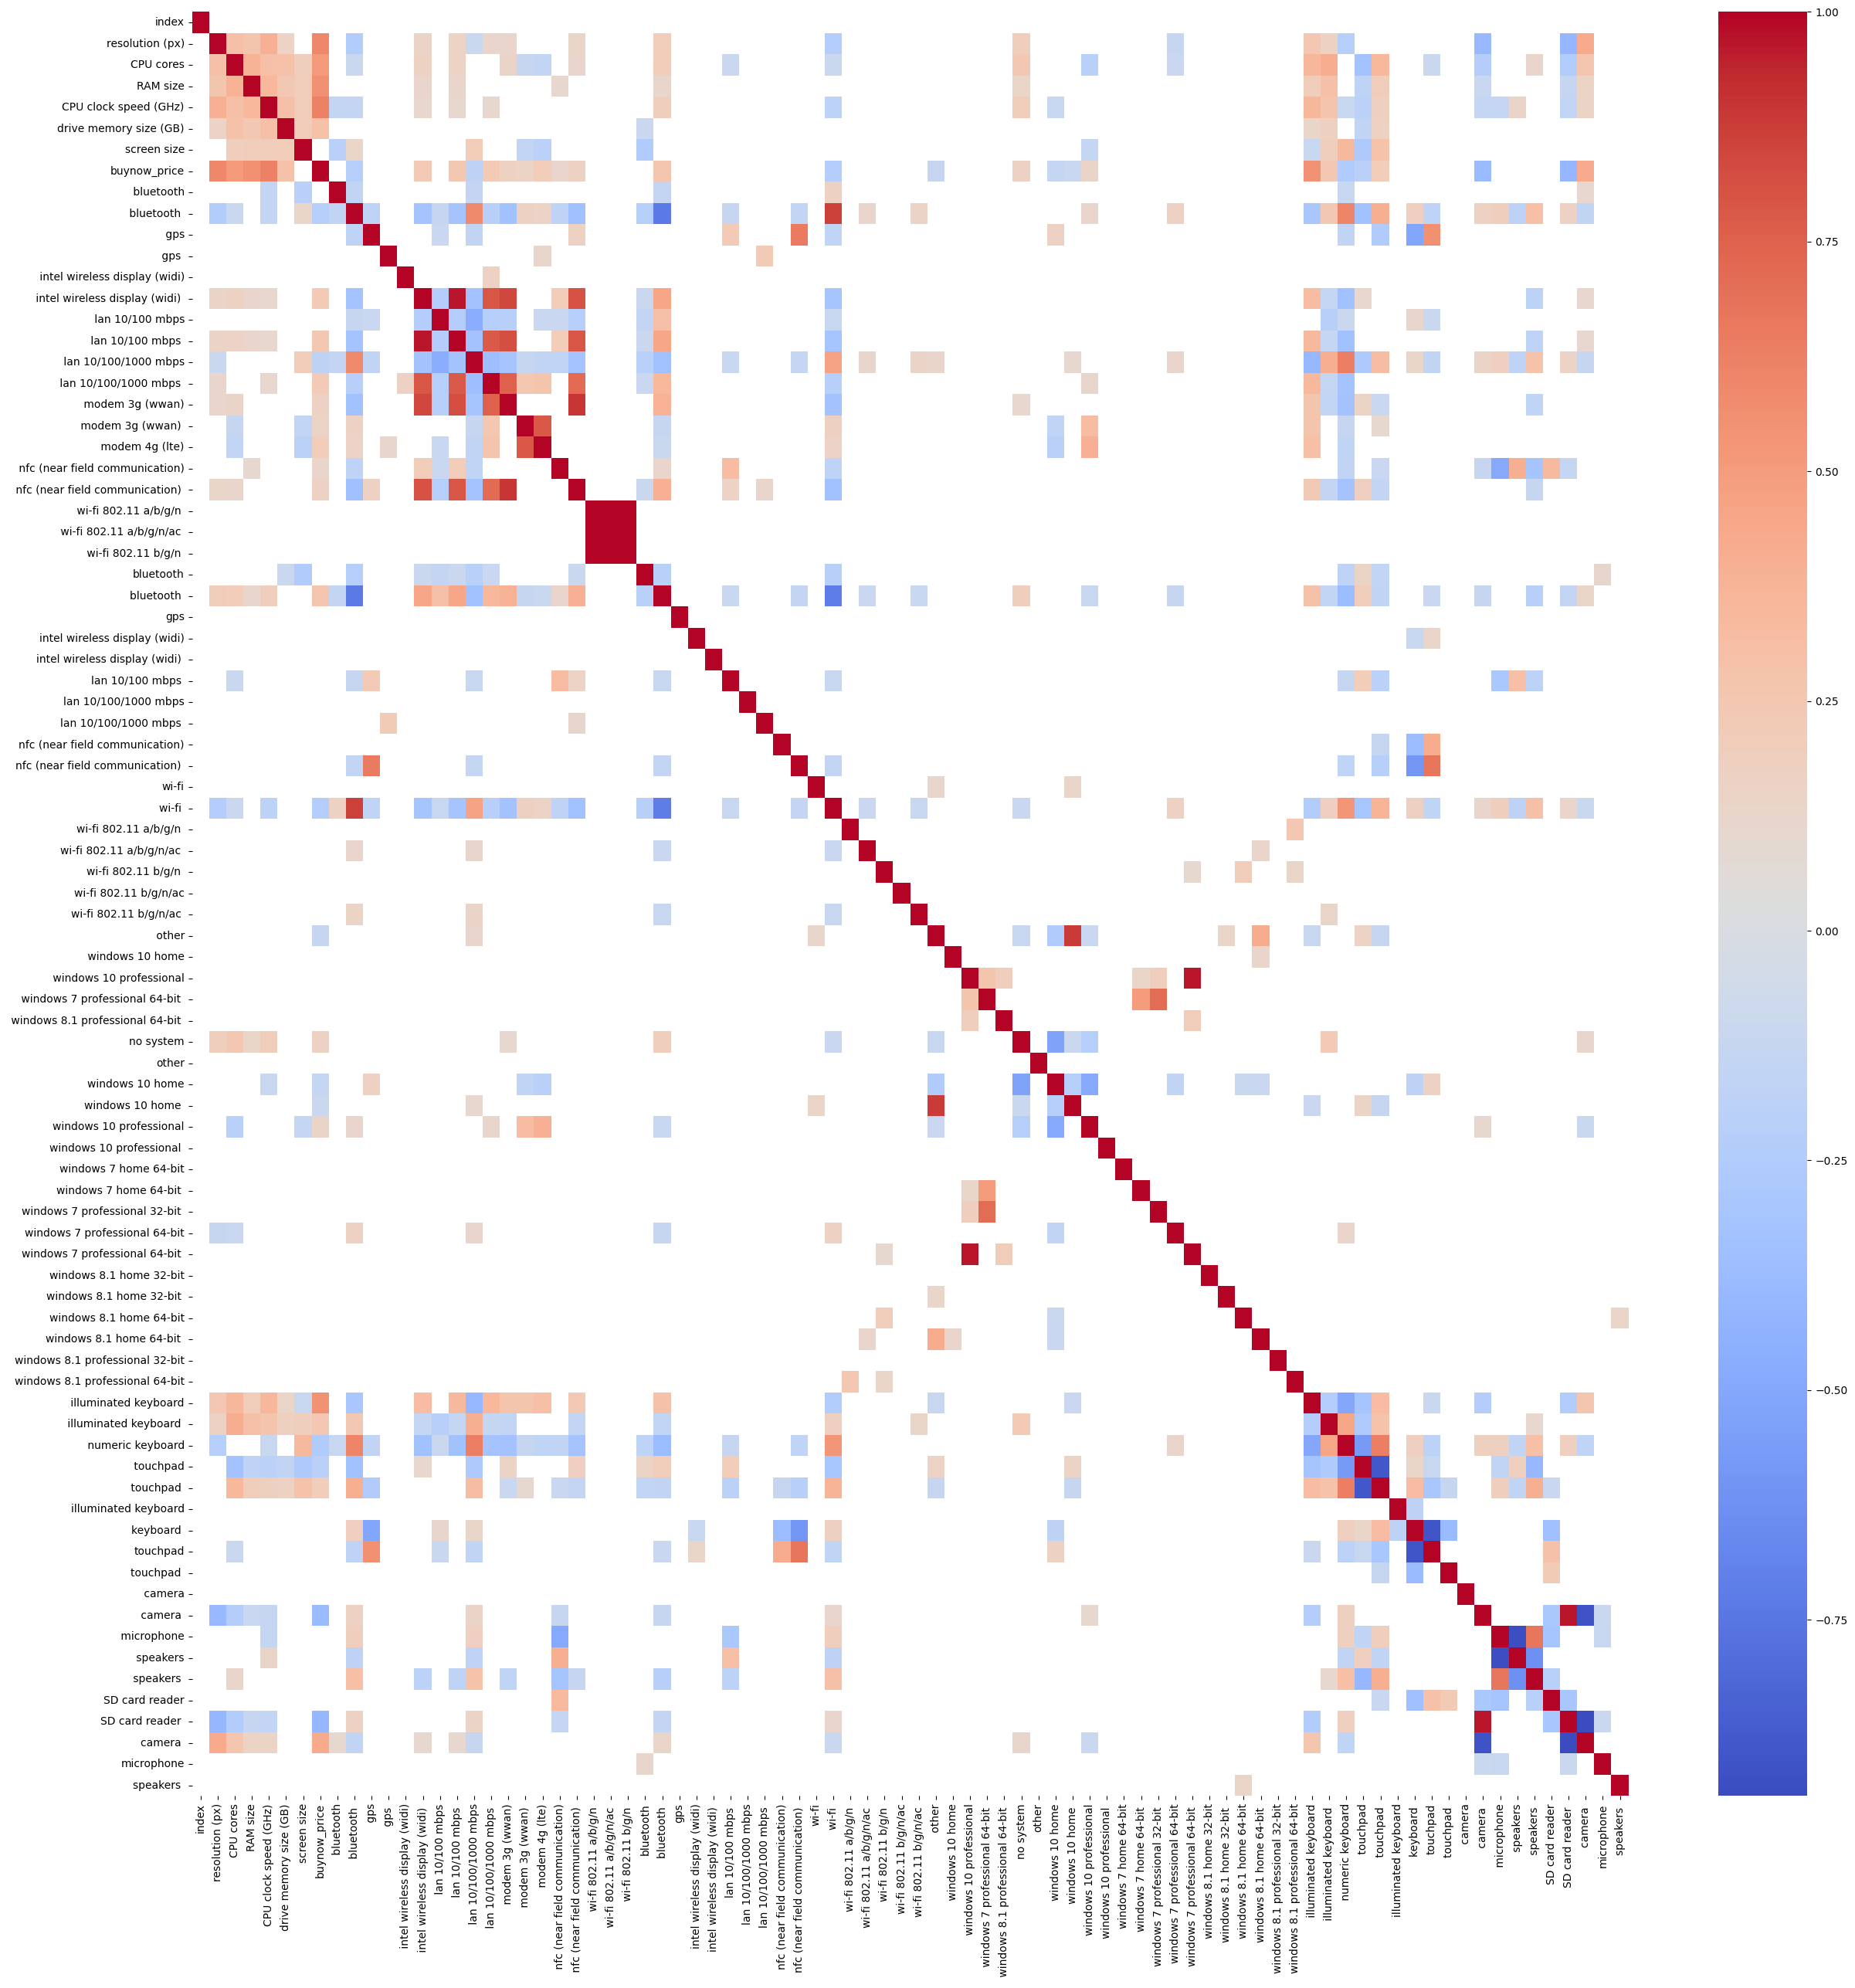

In [174]:
corr = data.corr()
mask = np.abs(corr) < .1
plt.figure(figsize=(30,30))
sns.heatmap(corr, mask=mask, cmap='coolwarm')

In [171]:
corr

,index,resolution (px),CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,buynow_price,bluetooth,bluetooth,...,camera,camera,microphone,speakers,speakers,SD card reader,SD card reader,camera,microphone,speakers
index,1.000000,0.001800,0.010484,0.013800,0.020349,0.017517,0.006538,0.006282,-0.019764,0.009372,...,-0.002995,0.007886,-0.006414,0.008484,-0.000845,0.002320,0.012473,-0.011741,-0.017734,-0.000314
resolution (px),0.001800,1.000000,0.299412,0.270606,0.397428,0.151987,0.018111,0.593357,0.024517,-0.236669,...,0.004107,-0.388241,0.037048,-0.050186,-0.024339,0.029538,-0.410551,0.423590,0.000896,-0.014427
CPU cores,0.010484,0.299412,1.000000,0.381261,0.300012,0.287283,0.188441,0.513994,-0.007704,-0.100165,...,-0.010325,-0.232033,0.014066,-0.008978,0.125096,-0.006691,-0.244178,0.262861,-0.023096,-0.010325
RAM size,0.013800,0.270606,0.381261,1.000000,0.350034,0.246416,0.200235,0.557498,-0.083851,-0.052461,...,-0.004172,-0.114388,-0.065620,0.083401,0.001654,-0.031880,-0.127138,0.147073,-0.016306,-0.011967
CPU clock speed (GHz),0.020349,0.397428,0.300012,0.350034,1.000000,0.301331,0.199680,0.625169,-0.143057,-0.144644,...,-0.001714,-0.132676,-0.133852,0.135741,-0.024784,0.022494,-0.146691,0.149762,-0.009895,-0.025424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SD card reader,0.002320,0.029538,-0.006691,-0.031880,0.022494,0.000760,-0.053607,0.010165,-0.013562,-0.064783,...,-0.000999,-0.282275,-0.315216,-0.018048,-0.211240,1.000000,-0.292953,-0.019592,-0.002234,-0.000999
SD card reader,0.012473,-0.410551,-0.244178,-0.127138,-0.146691,-0.026482,0.090063,-0.406671,-0.098049,0.169358,...,0.003409,0.963553,0.052440,0.061609,0.004733,-0.292953,1.000000,-0.941881,-0.107409,-0.048019
camera,-0.011741,0.423590,0.262861,0.147073,0.149762,0.031011,-0.066283,0.427871,0.108500,-0.153496,...,-0.003211,-0.907552,0.062153,-0.058028,0.075687,-0.019592,-0.941881,1.000000,-0.007183,-0.003211
microphone,-0.017734,0.000896,-0.023096,-0.016306,-0.009895,-0.025706,-0.085240,-0.014336,-0.004973,-0.025311,...,-0.000366,-0.103494,-0.115572,-0.006617,-0.077450,-0.002234,-0.107409,-0.007183,1.000000,-0.000366


## Modeling

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as sgb

In [176]:
X = data.drop('buynow_price', axis=1)
y = data['buynow_price']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
lr = LinearRegression(n_jobs=-1)
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
lasso = LassoCV(cv=5, random_state=42)
dt = DecisionTreeRegressor(criterion='squared_error', random_state=42)
rf = RandomForestRegressor(criterion='squared_error', n_jobs=-1, random_state=42)
models = [lr, ridge, lasso, dt, rf]

In [198]:
scoring_df = pd.DataFrame([[None, None], [None, None], [None, None], [None, None], [None, None]], columns = ['train', 'test'])
model_names = ['lr', 'ridge', 'lasso', 'dt', 'rf']
scoring_df.index = model_names
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    scoring_df.loc[model_names[i], 'train'] = train_score
    test_score = model.score(X_test, y_test)
    scoring_df.loc[model_names[i], 'test'] = test_score

In [199]:
scoring_df

,train,test
lr,0.800317,0.79151
ridge,0.800145,0.792911
lasso,0.54213,0.4962
dt,1.0,0.824606
rf,0.985947,0.891869


## Insights/Discussion

Our results are quite good here, especially whilst using the decision tree and random forest regressors. We do see a very high r^2 value for the training sets for both the decision tree as well as the random forest, so perhaps we may be slightly overfitting here. We could perform a grid search on parameters such as max depth, min samples split, etc. to see if we can train our model to generalize better to new data in future iterations.